# Evaluación modelos de Machine Learning

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

En este ejercicio pretendo hacer la comparación de 3 modelos de regresión:

- Regresión lineal
- Árbol de Decisión como Regresor
- Bosque Aleatorio de Regresión


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, mean_absolute_error

In [4]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [5]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

## Importar la data

In [6]:
salary = pd.read_csv("Datasets/Salary_Data.csv")

## Salary Data

### Conocer la data

In [7]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### Graficar la Data

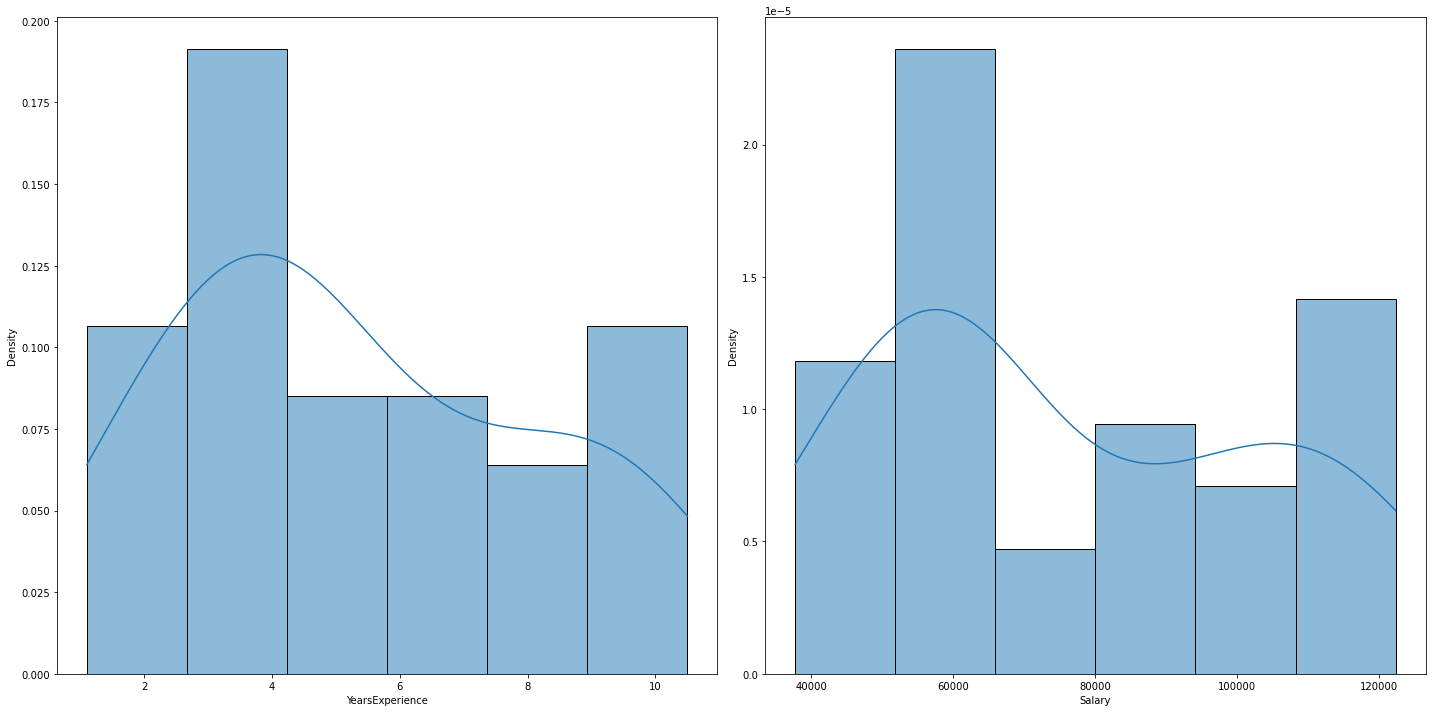

In [11]:
cols = 2

fig, ax = plt.subplots(ncols=cols, figsize=(20, 10))

col = salary.columns
index = 0

for j in range(cols):
    sns.histplot(salary[col[index]], ax=ax[j], kde=True, stat='density')
    index += 1

plt.tight_layout()

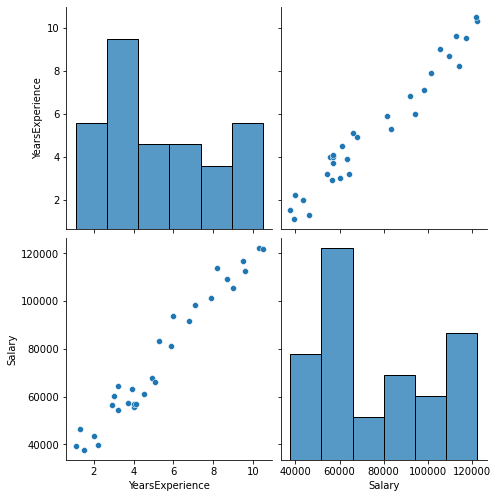

In [12]:
sns.pairplot(salary, diag_kind='hist', height=3.5)

La decisión de aplicar modelos de regresión es debido a que la gráfica de relación entre las columnas YearsExperience y Salary presentan un patrón de una gráfica lineal.

<AxesSubplot:xlabel='Salary', ylabel='Density'>

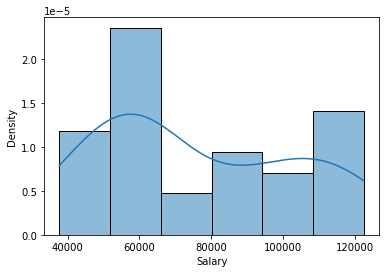

In [13]:
sns.histplot(salary['Salary'], kde=True, stat='density')

### Separar la data

In [14]:
x_train = salary.sample(frac=0.8, random_state=42)
x_test = salary.drop(x_train.index)
y_train = x_train.pop('Salary')
y_test = x_test.pop('Salary')

### Establecer un Modelo de Machine Learning

#### Modelo de Regresión Lineal

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
pred = lr.predict(x_test)

In [17]:
error = np.sqrt(mean_squared_error(y_test, pred))
print('Error porcentual: %f' % (error*100) )

Error porcentual: 627104.824089


##### Matriz de Confusión

Text(43.0, 0.5, 'True')

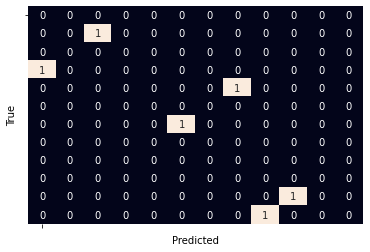

In [18]:
c_matrix = confusion_matrix(y_test, pred)
sns.heatmap(c_matrix, annot=True, fmt='d', cbar=False, xticklabels=salary.columns.names, yticklabels=salary.columns.names)
plt.xlabel('Predicted')
plt.ylabel('True')

Podemos observar a partir de la matriz, que son muy pocos los datos a los que "atina" la predicción, y eso lo podemos comprobar en que el error es ridiculo.

#### Modelo de Decision Tree Regressor

##### Método del codo

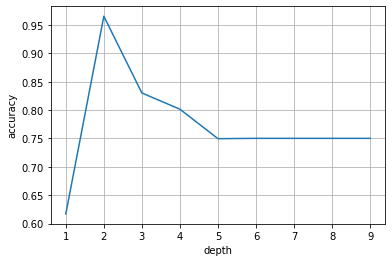

In [19]:
max_depth_lista = list(range(1, 10))

accuracy = []

for depth in max_depth_lista:
    arbol_clas = DecisionTreeRegressor(max_depth=depth, random_state=0)
    arbol_clas.fit(x_train, y_train)
    score = arbol_clas.score(x_test, y_test)
    accuracy.append(score)

plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

El método del Codo, es básicamente una gráfica en la que se muestran la mejor profundidad para obtener el nivel de acertibidad más alto. En este caso la profunfidad ideal es de 2.

##### Opción más óptima

In [21]:
dtr = DecisionTreeRegressor(max_depth=2, random_state=0)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [22]:
pred = dtr.predict(x_test)

In [23]:
accuracy_global = dtr.score(x_test, y_test)

print('Precisión Global: %', str(accuracy_global * 100))
print('Error absoluto medio:', mean_absolute_error(y_test, pred))
print('Error medio cuadrado:', mean_squared_error(y_test, pred))
print('Desviación de la raíz cuadrada media:', np.sqrt(mean_squared_error(y_test, pred)))

Precisión Global: % 96.5183390993116
Error absoluto medio: 2233.1666666666665
Error medio cuadrado: 8739693.510416666
Desviación de la raíz cuadrada media: 2956.2972635404353


La precisión es del 96%, pero los niveles de error son demasiado altos, esto puede ser debido a la poca cantidad de datos dentro del dataset.

##### Matriz de Confusión

Text(43.0, 0.5, 'True')

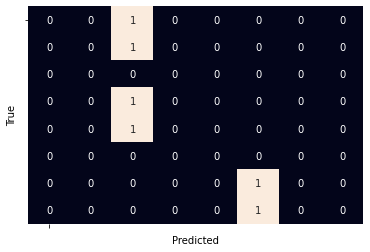

In [24]:
c_matrix = confusion_matrix(y_test, pred)
sns.heatmap(c_matrix, annot=True, fmt='d', cbar=False, xticklabels=salary.columns.names, yticklabels=salary.columns.names)
plt.xlabel('Predicted')
plt.ylabel('True')

#### Modelo de Random Forest Regressor

In [25]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(x_train, y_train)
pred = rfr.predict(x_test)

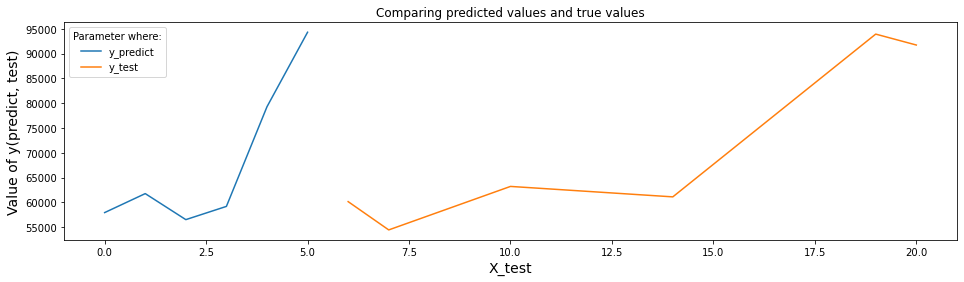

In [26]:
plt.figure(figsize=(16,4))
plt.plot(pred, label='y_predict')
plt.plot(y_test, label='y_test')

plt.xlabel('X_test', fontsize=14)
plt.ylabel('Value of y(predict, test)', fontsize=14)

plt.title('Comparing predicted values and true values')
plt.legend(title='Parameter where:')

plt.show()

In [27]:
np.sqrt(mean_squared_error(y_test, pred))

7398.242269471887

In [28]:
y_test.std()

17355.83406235494

El nivel de error es muy alto, y en la gráfica de comparación entre los valores predichos y los valores base, podemos observa que no se predicen de manera correcta.

##### Matriz de Confusión

Text(43.0, 0.5, 'True')

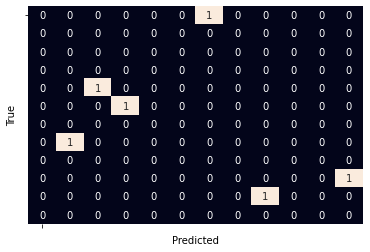

In [29]:
c_matrix = confusion_matrix(y_test, pred)
sns.heatmap(c_matrix, annot=True, fmt='d', cbar=False, xticklabels=salary.columns.names, yticklabels=salary.columns.names)
plt.xlabel('Predicted')
plt.ylabel('True')